In [1]:
# 导入数据
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# 查看MINST数据集大小
print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)
print(mnist.validation.images.shape, mnist.validation.labels.shape)

(55000, 784) (55000, 10)
(10000, 784) (10000, 10)
(5000, 784) (5000, 10)


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


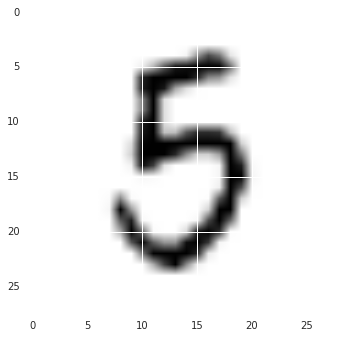

In [43]:
# 显示训练集中的第一幅图像
import matplotlib.pyplot as plt

# 打印训练集第一幅图像的标签
print(mnist.train.labels[0])

# 将1*784向量转换成28*28
img1 = mnist.train.images[0].reshape((28, 28))

plt.imshow(img1)
plt.show()

In [48]:
# 构建计算图
import tensorflow as tf

sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

In [49]:
# 定义损失函数
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [50]:
# 训练模型
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
tf.global_variables_initializer().run()

for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  train_step.run({x: batch_xs, y_: batch_ys})

# 计算准确率
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

0.9164


(784, 10)


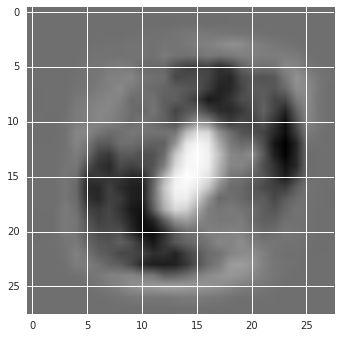

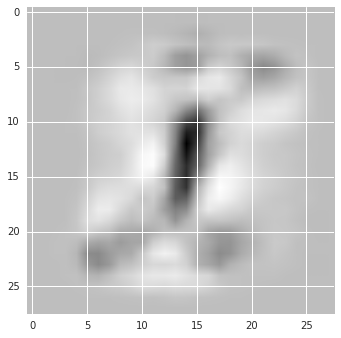

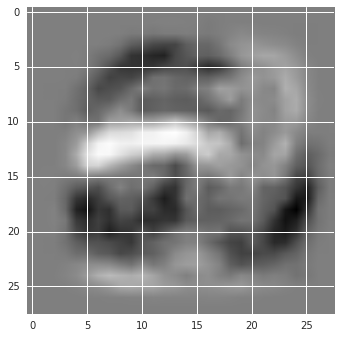

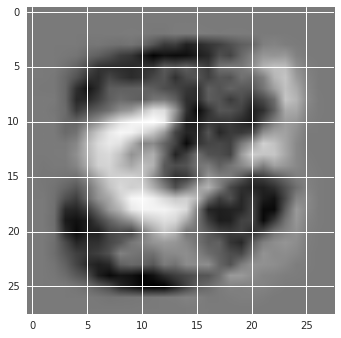

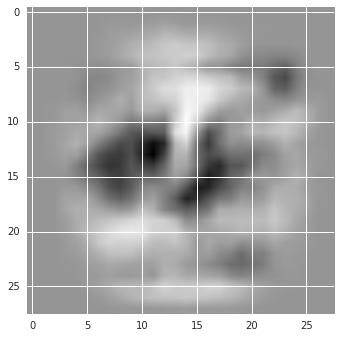

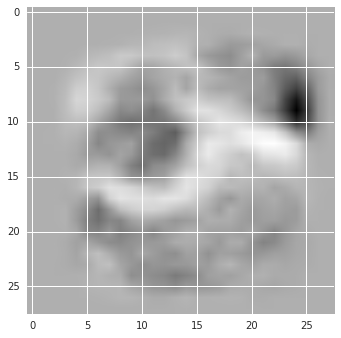

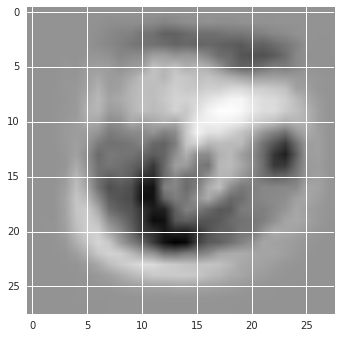

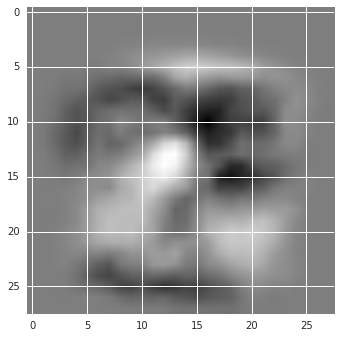

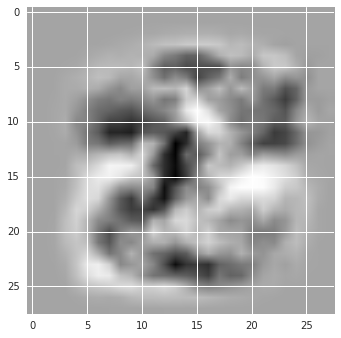

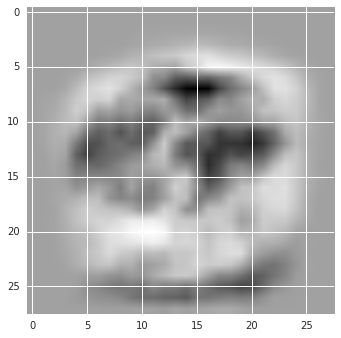

In [53]:
import matplotlib.pyplot as plt

W_ = W.eval()
print(W_.shape)

for i in range(10):
  plt.imshow(W_[:,i].reshape(28, 28))
  plt.show()

使用二次函数拟合: $feature_i = \sum_{j}w1_{i,j}x_j^2 + \sum_{j}w2_{i,j}x_j + b_i$

In [46]:
# 构建计算图
import tensorflow as tf

sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, [None, 784])
x2 = tf.square(x)
W1 = tf.Variable(tf.zeros([784, 10]))
W2 = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x2, W1) + tf.matmul(x, W2) + b)

# 定义损失函数
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# 训练模型
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
tf.global_variables_initializer().run()

for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  train_step.run({x: batch_xs, y_: batch_ys})

# 计算准确率
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))


0.9191
